* import data

In [1]:
import pandas as pd
df = pd.read_csv('hob_data_w_calcs_v3.csv')
df = df.drop(columns='Unnamed: 0')

# Data Labeling Schemes

### visual comparison of binning schemes

* plot various histograms to decide on good distributions to discretize BA_pct into categorical levels

In [7]:
import matplotlib.pyplot as plt

(array([531., 421., 636.]),
 array([  0.        ,  33.33333333,  66.66666667, 100.        ]),
 <BarContainer object of 3 artists>)

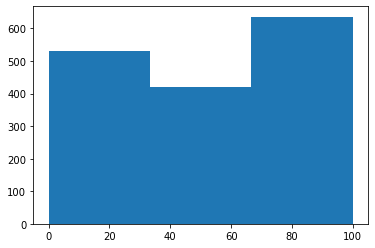

In [16]:
# 3 bins could work
plt.hist(df['BA_pct'],bins=3)

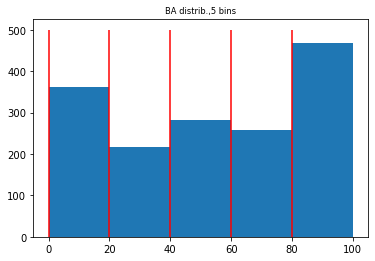

In [9]:
# also like 5 bins
fig,ax = plt.subplots()
numBins = 5
ax.hist(df['BA_pct'],bins=numBins)
ax.set_title(f'BA distrib.,{numBins} bins',fontsize='small')
ax.vlines(range(0,100,int(100/numBins)),0,500,color='red')

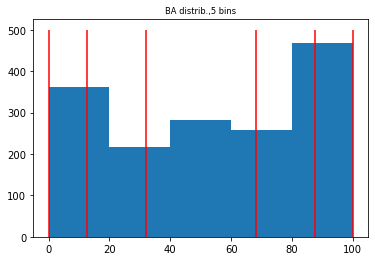

In [10]:
# or 5 bins with uneven distribution
fig,ax = plt.subplots()
numBins = 5
ax.hist(df['BA_pct'],bins=numBins)
ax.set_title(f'BA distrib.,{numBins} bins',fontsize='small')
ax.vlines([0,12.5,32,68,87.5,100],0,500,color='red')

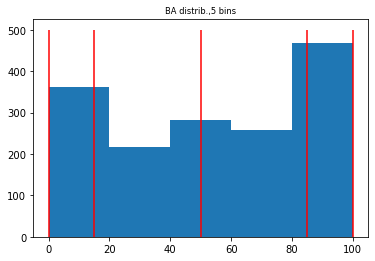

In [11]:
# also like 5 bins
fig,ax = plt.subplots()
numBins = 5
ax.hist(df['BA_pct'],bins=numBins)
ax.set_title(f'BA distrib.,{numBins} bins',fontsize='small')
ax.vlines([0,15,50,85,100],0,500,color='red')

### statistical comparison of binning shchemes

* apply tentative BA labels based on review of histograms (above) 
* assess label quality using group/aggregate to view stats

In [12]:
splits1 = [x for x in range(0,100,int(100/3))]

df.loc[(df['BA_pct'] <= splits1[1]),'label1'] = 'low'
df.loc[(df['BA_pct'] > splits1[1])&(df['BA_pct'] <= splits1[2]),'label1'] = 'moderate'
df.loc[(df['BA_pct'] > splits1[2]),'label1'] = 'high'

df.groupby('label1').agg({'BA_pct':['count','mean','std']})

BA_pct                      
          count       mean        std
label1                               
high        636  85.583333   9.714271
low         531  11.764878  10.665971
moderate    421  50.356532   8.445314

In [13]:
## ONE OF THE TWO BEST
splits2 = [0,19,38,62,81,100]

df.loc[(df['BA_pct'] <= splits2[1]),'label2a'] = 'very low'
df.loc[(df['BA_pct'] > splits2[1])&(df['BA_pct'] <= splits2[2]),'label2a'] = 'low'
df.loc[(df['BA_pct'] > splits2[2])&(df['BA_pct'] <= splits2[3]),'label2a'] = 'moderate'
df.loc[(df['BA_pct'] > splits2[3])&(df['BA_pct'] <= splits2[4]),'label2a'] = 'high'
df.loc[(df['BA_pct'] > splits2[4]),'label2a'] = 'very high'

df.groupby('label2a').agg({'BA_pct':['count','mean','std']})

BA_pct                     
           count       mean       std
label2a                              
high         317  74.850158  5.541167
low          216  27.371296  5.868030
moderate     339  50.725959  6.169008
very high    356  92.957865  5.491188
very low     360   5.415139  5.785194

In [14]:
## ONE OF THE TWO BEST
splits2 = [0,18,39,61,82,100]

df.loc[(df['BA_pct'] <= splits2[1]),'label2b'] = 'very low'
df.loc[(df['BA_pct'] > splits2[1])&(df['BA_pct'] <= splits2[2]),'label2b'] = 'low'
df.loc[(df['BA_pct'] > splits2[2])&(df['BA_pct'] <= splits2[3]),'label2b'] = 'moderate'
df.loc[(df['BA_pct'] > splits2[3])&(df['BA_pct'] <= splits2[4]),'label2b'] = 'high'
df.loc[(df['BA_pct'] > splits2[4]),'label2b'] = 'very high'

df.groupby('label2b').agg({'BA_pct':['count','mean','std']})

BA_pct                     
           count       mean       std
label2b                              
high         332  74.751506  5.833606
low          222  27.322973  6.002312
moderate     330  50.557879  5.960637
very high    348  93.209770  5.293051
very low     356   5.263904  5.637445

In [15]:
splits3 = [0,20,50,80,100]
df.loc[(df['BA_pct'] <= splits3[1]),'label3'] = 'very low'
df.loc[(df['BA_pct'] > splits3[1])&(df['BA_pct'] <= splits3[2]),'label3'] = 'low'
df.loc[(df['BA_pct'] > splits3[2])&(df['BA_pct'] <= splits3[3]),'label3'] = 'high'
df.loc[(df['BA_pct'] > splits3[3]),'label3'] = 'very high'

df.groupby('label3').agg({'BA_pct':['count','mean','std']})

BA_pct                     
           count       mean       std
label3                               
high         432  69.940046  9.229638
low          389  39.324422  9.825776
very high    361  92.792244  5.629638
very low     406   7.066379  7.145556

* with several comparisons, final label scheme decided. 
* re-load data, and apply final labeling schemes

In [2]:
df = pd.read_csv('hob_data_w_calcs_v3.csv')
df = df.drop(columns='Unnamed: 0')

# Labels 1
splits1 = [x for x in range(0,100,int(100/3))]

df.loc[(df['BA_pct'] <= splits1[1]),'label1'] = 'low'
df.loc[(df['BA_pct'] > splits1[1])&(df['BA_pct'] <= splits1[2]),'label1'] = 'moderate'
df.loc[(df['BA_pct'] > splits1[2]),'label1'] = 'high'

#df.groupby('label1').agg({'BA_pct':['count','mean','std']})


# Labels 2
splits3 = [0,20,50,80,100]
df.loc[(df['BA_pct'] <= splits3[1]),'label2'] = 'very low'
df.loc[(df['BA_pct'] > splits3[1])&(df['BA_pct'] <= splits3[2]),'label2'] = 'low'
df.loc[(df['BA_pct'] > splits3[2])&(df['BA_pct'] <= splits3[3]),'label2'] = 'high'
df.loc[(df['BA_pct'] > splits3[3]),'label2'] = 'very high'

#df.groupby('label2').agg({'BA_pct':['count','mean','std']})


# Labels 3a
splits2 = [0,19,38,62,81,100]

df.loc[(df['BA_pct'] <= splits2[1]),'label3a'] = 'very low'
df.loc[(df['BA_pct'] > splits2[1])&(df['BA_pct'] <= splits2[2]),'label3a'] = 'low'
df.loc[(df['BA_pct'] > splits2[2])&(df['BA_pct'] <= splits2[3]),'label3a'] = 'moderate'
df.loc[(df['BA_pct'] > splits2[3])&(df['BA_pct'] <= splits2[4]),'label3a'] = 'high'
df.loc[(df['BA_pct'] > splits2[4]),'label3a'] = 'very high'

#df.groupby('label3a').agg({'BA_pct':['count','mean','std']})

# Labels 3b
splits2 = [0,18,39,61,82,100]

df.loc[(df['BA_pct'] <= splits2[1]),'label3b'] = 'very low'
df.loc[(df['BA_pct'] > splits2[1])&(df['BA_pct'] <= splits2[2]),'label3b'] = 'low'
df.loc[(df['BA_pct'] > splits2[2])&(df['BA_pct'] <= splits2[3]),'label3b'] = 'moderate'
df.loc[(df['BA_pct'] > splits2[3])&(df['BA_pct'] <= splits2[4]),'label3b'] = 'high'
df.loc[(df['BA_pct'] > splits2[4]),'label3b'] = 'very high'

#df.groupby('label3b').agg({'BA_pct':['count','mean','std']})

## Recap
* <font color='gray'> Regarding data labels, recall that: </font>
  * <font color='gray'> The data has 5 labels: </font>
      *  <font color='gray'> **1 continuous label:** the BA percentage (_the original label_) </font> 
      *  <font color='gray'>**4 categorical labels:** the discretized groups of BA percentage </font> <br>
  * <font color='gray'> The categorical label columns were created by dividing _BA percentage_ into groups. The _"bucketing"/discretization ranges_ for these divisions were determined based on the review of histogram distributions and label statistics (_e.g.,_ grouped label mean & stdev) </font>

### One additional label, Spark built-in method

* for comparison with the manually-labeled categorical columns, an additional categorical label column will be added using Spark's built-in **QuantileDiscretizer**

In [ ]:
from pyspark.ml.feature import QuantileDiscretizer
import pandas as pd
qd5 = QuantileDiscretizer(numBuckets=5,inputCol='BA_pct',outputCol='label_QD5')
data = qd5.fit(data).transform(data)

## Summary: Final labeling scheme
* <font color='blue'> _For a quick review of all data labels, let's display them in a grouped DF:_ </font>

In [ ]:
''' # FINAL LABELS:
# ...1 continuous label column
# ...5 categorical label columns
# ---- label1 has 3 categories          -->                     low   /  mid   / high 
# ---- label2 has 4 categories          -->          very low / low       /      high / very high
# ---- the rest have 5 categories       -->          very low / low / moderate / high / very high
'''
from pyspark.sql import functions as F

data.select(['BA_pct','label_QD5','label1','label2','label3a','label3b'])\
                .groupby('label_QD5','label3a','label3b','label2','label1')\
                    .agg(F.count('BA_pct'),F.min('BA_pct'),F.max('BA_pct'))\
                        .orderBy('max(BA_pct)')\
                            .show()

# Export labeled data

* clean up and export

In [3]:
df.to_csv('bioavailability_data_final.csv')

* OPTIONAL: we can also make an excel file with molecular structure images in columns

In [ ]:
from rdkit.Chem import PandasTools
import xlsxwriter

viztest = df.copy()
PandasTools.AddMoleculeColumnToFrame(viztest,smilesCol='smile',molCol='structure',includeFingerprints=False)

# original order
PandasTools.SaveXlsxFromFrame(viztest, 'bioavailability_data_final_withStructures.xlsx', molCol='structure',size=(64,64))

# alphabetized by drug name
viztest_sorted = viztest.sort_values(by=['Name'])
PandasTools.SaveXlsxFromFrame(viztest_sorted, 'bioavailability_data_final_withStructures_sorted.xlsx', molCol='structure',size=(64,64))